In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import pandas as pd
from pandas import DataFrame
import numpy as np

from sklearn import metrics
from sklearn.metrics import pairwise_distances
import pylab as pl

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN

In [3]:
newFilePath = "/Users/luisricardoferraz/book-similarity/test/tutorial/tutorial/spiders/synopsis-preprocessing/"

In [4]:
Y = pd.read_csv(newFilePath+'MatrixOfVectorizedSynopsis.csv')
titulos = Y['titulo']
Y = Y.drop(['Unnamed: 0','titulo'],1)

In [5]:
filePath = '/Users/luisricardoferraz/book-similarity/test/tutorial/tutorial/spiders/clustering/'

In [6]:
A = pd.read_csv(newFilePath+'MatrixOfDistances.csv')
A = A.drop(['Unnamed: 0'],1)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


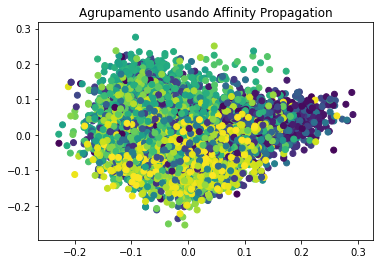

In [7]:
ap = AffinityPropagation(damping=0.7,max_iter=400,affinity='precomputed')
ap.fit(A)
apclusters = ap.labels_.tolist()
apcenters = ap.cluster_centers_indices_.tolist()

specificLogAffinity = ""

logAffinity = "Resultados do agrupamento usando Affinity Propagation"

logAffinity += "\n\nTotal de iterações: " + str(ap.n_iter_) + "\n"

apdataframe = pd.DataFrame()
apdataframe['titulo'] = titulos
apdataframe['cluster'] = apclusters

n_clusters = max(apdataframe['cluster'])+1

for i in range(n_clusters):
    new_dataframe = apdataframe.loc[apdataframe['cluster'] == i]
    lista_livros = []
    lista_livros = list(new_dataframe['titulo'])
    logAffinity += "\nTotal de livros do cluster %d" %i + ": " + str(len(lista_livros)) + "\n"
    logAffinity += "\nCentroide do cluster %d" %i + ": " + str(apcenters[i]) + " - " + str(apdataframe['titulo'][apcenters[i]]) + "\n"
    specificLogAffinity += "\nTotal de livros do cluster %d" %i + ": " + str(len(lista_livros))
    specificLogAffinity += "\nLista de livros do cluster %d" %i + ": " + ", ".join(lista_livros) + "\n"

logAffinity += "\n\nÍndice Silhueta: " + str(metrics.silhouette_score(Y, ap.labels_, metric='euclidean'))

logAffinity += "\n\nÍndice Davies-Bouldin: " + str(metrics.davies_bouldin_score(Y, ap.labels_))

logAffinity += "\n\nÍndice Calinski-Harabasz: " + str(metrics.calinski_harabaz_score(Y, ap.labels_))


pca = PCA(n_components=2).fit_transform(Y)
pl.figure('Reference Plot')
pl.scatter(pca[:, 0], pca[:, 1], c=apdataframe['cluster'])
pl.title('Agrupamento usando Affinity Propagation')

plt.savefig(filePath+"resultado-Affinity-Propagation.png")
pl.show()

logAffinity += "\n\nArquivo: " + "resultado-Affinity-Propagation.png"
logAffinity += "\n\n"

with open(filePath+'listaDeLivros-AffinityPropagation.txt','w') as log:
    log.write(specificLogAffinity)
    
with open(filePath+'log-AffinityPropagation.txt','w') as log:
    log.write(logAffinity)

In [8]:
km = KMeans(n_clusters=1208, max_iter=400)
km.fit(Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
    n_clusters=1208, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


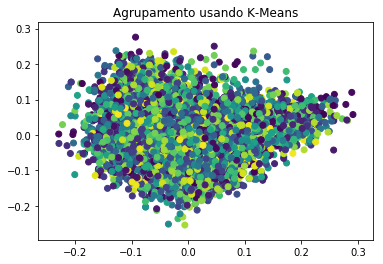

In [9]:
clusters = km.labels_.tolist()
num_clusters = 1208
specificLogKmeans = ""

logKmeans = "Quantidade de clusters para o K-Means: 1208"

logKmeans += "\n\nTotal de iterações: " + str(km.n_iter_) + "\n"

dataframe = pd.DataFrame()
dataframe['titulo'] = titulos
dataframe['cluster'] = clusters

for i in range(num_clusters):
    new_dataframe = dataframe.loc[dataframe['cluster'] == i]
    lista_livros = []
    lista_livros = list(new_dataframe['titulo'])
    logKmeans += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros)) + "\n"
    specificLogKmeans += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros)) + "\n"
    specificLogKmeans += 'Lista de livros do cluster %d' %i + ": " + ", ".join(lista_livros) + "\n"

logKmeans += "\n\nÍndice Silhueta: " + str(metrics.silhouette_score(Y, km.labels_, metric='euclidean'))

logKmeans += "\n\nÍndice Davies-Bouldin: " + str(metrics.davies_bouldin_score(Y, km.labels_))

logKmeans += "\n\nÍndice Calinski-Harabasz: " + str(metrics.calinski_harabaz_score(Y, km.labels_))

logKmeans += "\n\nArquivo: " + 'resultado-KMeans.png' + "\n\n"

pca = PCA(n_components=2).fit_transform(Y)
pl.figure('Reference Plot')
pl.scatter(pca[:, 0], pca[:, 1], c=dataframe['cluster'])
pl.title('Agrupamento usando K-Means')

plt.savefig(filePath+'resultado-KMeans.png')
pl.show()

with open(filePath+'listaDeLivros-Kmeans.txt','w') as log:
    log.write(specificLogKmeans)
    
with open(filePath+'log-Kmeans.txt','w') as log:
    log.write(logKmeans)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


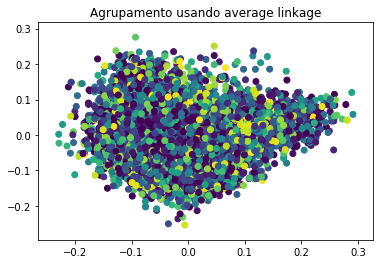

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


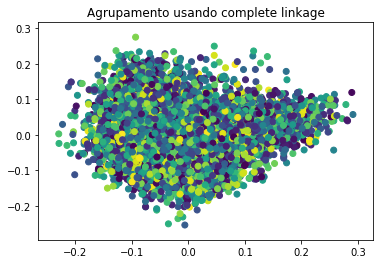

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


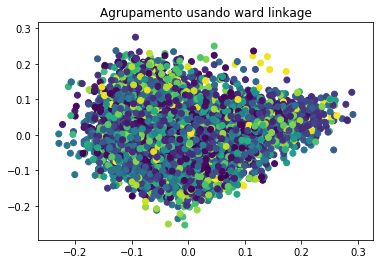

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


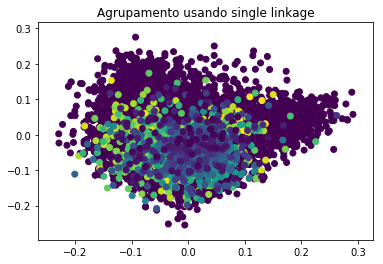

In [10]:
for linkage in {"ward","complete", "average", "single"}:
    logAgglomerative = ""
    specificLogAgglomerative = ""
    
    if linkage == "ward":
        ag = AgglomerativeClustering(n_clusters=1208,affinity='euclidean',linkage=linkage)
        ag.fit(Y)
    else:
        ag = AgglomerativeClustering(n_clusters=1208,affinity='precomputed',linkage=linkage)
        ag.fit(A)
    

    agclusters = ag.labels_.tolist()

    agdataframe = pd.DataFrame()
    agdataframe['titulo'] = titulos
    agdataframe['cluster'] = agclusters

    for i in range(num_clusters):
        new_dataframe = agdataframe.loc[agdataframe['cluster'] == i]
        lista_livros = []
        lista_livros = list(new_dataframe['titulo'])
        logAgglomerative += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros)) + "\n"
        specificLogAgglomerative += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros)) + "\n"
        specificLogAgglomerative += '\nLista de livros do cluster %d' %i + ": " + ", ".join(lista_livros) + "\n"

    logAgglomerative += "\n\nÍndice Silhueta: " + str(metrics.silhouette_score(Y, ag.labels_, metric='euclidean'))

    logAgglomerative += "\n\nÍndice Davies-Bouldin: " + str(metrics.davies_bouldin_score(Y, ag.labels_))

    logAgglomerative += "\n\nÍndice Calinski-Harabasz: " + str(metrics.calinski_harabaz_score(Y, ag.labels_))

    pca = PCA(n_components=2).fit_transform(Y)
    pl.figure('Reference Plot')
    pl.scatter(pca[:, 0], pca[:, 1], c=agdataframe['cluster'])
    pl.title('Agrupamento usando '+linkage+' linkage')
    
    plt.savefig(filePath+"resultado-"+linkage+"-linkage.png")
    
    pl.show()
    
    logAgglomerative += "\n\nArquivo: "+ "resultado-"+linkage+"-linkage.png"
    
    logAgglomerative += "\n\n"
    
    with open(filePath+'listaDeLivros-'+linkage+'-linkage.txt','w') as log:
        log.write(specificLogAgglomerative)
        
    with open(filePath+'log-'+linkage+'-linkage.txt','w') as log:
        log.write(logAgglomerative)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


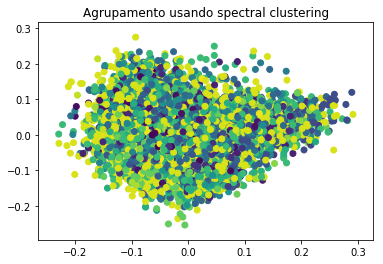

Resultados do agrupamento usando Spectral Clustering
Total de livros do cluster 0: 11

Total de livros do cluster 1: 3

Total de livros do cluster 2: 13

Total de livros do cluster 3: 3

Total de livros do cluster 4: 3

Total de livros do cluster 5: 7

Total de livros do cluster 6: 17

Total de livros do cluster 7: 2

Total de livros do cluster 8: 5

Total de livros do cluster 9: 1

Total de livros do cluster 10: 3

Total de livros do cluster 11: 2

Total de livros do cluster 12: 11

Total de livros do cluster 13: 1

Total de livros do cluster 14: 3

Total de livros do cluster 15: 1

Total de livros do cluster 16: 1

Total de livros do cluster 17: 1

Total de livros do cluster 18: 1

Total de livros do cluster 19: 2

Total de livros do cluster 20: 9

Total de livros do cluster 21: 2

Total de livros do cluster 22: 1

Total de livros do cluster 23: 1

Total de livros do cluster 24: 18

Total de livros do cluster 25: 1

Total de livros do cluster 26: 1

Total de livros do cluster 27: 4



In [7]:
B = A

spc = SpectralClustering(n_clusters=1208,affinity='precomputed')
spc.fit(B)

spcclusters = spc.labels_.tolist()
spcdataframe = pd.DataFrame()
spcdataframe['titulo'] = titulos
spcdataframe['cluster'] = spcclusters

n_clusters = max(spcdataframe['cluster'])+1

specificLogSpectral = ""

logSpectral = "Resultados do agrupamento usando Spectral Clustering"

for i in range(n_clusters):
    new_dataframe = spcdataframe.loc[spcdataframe['cluster'] == i]
    lista_livros = []
    lista_livros = list(new_dataframe['titulo'])
    logSpectral += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros)) + "\n"
    specificLogSpectral += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros))
    specificLogSpectral += '\nLista de livros do cluster %d' %i + ": " + ", ".join(lista_livros) + "\n"

logSpectral += "\n\nÍndice Silhueta: " + str(metrics.silhouette_score(Y, spc.labels_, metric='euclidean'))

logSpectral += "\n\nÍndice Davies-Bouldin: " + str(metrics.davies_bouldin_score(Y, spc.labels_))

logSpectral += "\n\nÍndice Calinski-Harabasz: "+ str(metrics.calinski_harabaz_score(Y, spc.labels_))

pca = PCA(n_components=2).fit_transform(Y)
pl.figure('Reference Plot')
pl.scatter(pca[:, 0], pca[:, 1], c=spcdataframe['cluster'])
pl.title('Agrupamento usando spectral clustering')

plt.savefig(filePath+'resultado-Spectral.png')
pl.show()

logSpectral += "\n\nArquivo: " + 'resultado-Spectral.png'
logSpectral += "\n\n"

print(logSpectral)

with open(filePath+'listaDeLivros-SpectralClustering.txt','w') as log:
    log.write(specificLogSpectral)
    
with open(filePath+'log-SpectralClustering.txt','w') as log:
    log.write(logSpectral)